In [3]:
from days_statistics import DaysStatistics
from data_helper import DataHelper
from grid_search import MyGridSearch
from sklearn.ensemble import ExtraTreesRegressor
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from models.tree_models import MyExtraTreesRegressor, MyExtraTreesClassifier, MyRandomForestRegressor, MyRandomForestClassifier
%matplotlib inline

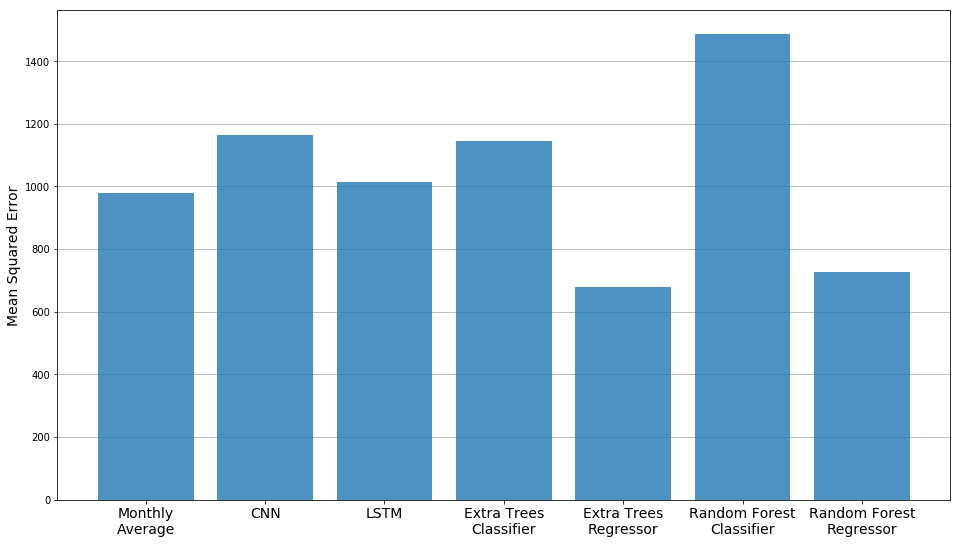

In [2]:
models = ('Monthly\nAverage', 'CNN', 'LSTM', 'Extra Trees\nClassifier', 'Extra Trees\nRegressor', 'Random Forest\nClassifier', 'Random Forest\nRegressor',)
y_pos = np.arange(len(models))
performance = [979, 1165, 1013, 1146, 674, 1488, 728]
fig, ax = plt.subplots(figsize=(16,9))
ax.grid(axis='y')
ax.bar(y_pos, performance, align='center', alpha=0.8)
ax.set_axisbelow(True)
plt.xticks(y_pos, models, fontsize=14)
ax.set_ylabel('Mean Squared Error', fontsize=14)
plt.savefig('performance.png', dpi=300, bbox_inches='tight')

In [5]:
time_steps = [1,2,3,4,5,6,7,8,9,10,11,12]
mse = []

for ts in time_steps:
    etr = MyExtraTreesRegressor()
    etr.time_steps_back = ts
    etr.fit_on_training_set()
    mse.append(etr.get_mse())
    print("MSE for %d is %.2f\n"%(ts, mse[-1]))

MSE for 1 is 846.06

MSE for 2 is 795.61

MSE for 3 is 729.98

MSE for 4 is 721.44

MSE for 5 is 733.06

MSE for 6 is 701.61

MSE for 7 is 713.66

MSE for 8 is 677.96

MSE for 9 is 673.92

MSE for 10 is 680.47

MSE for 11 is 678.58

MSE for 12 is 682.41

MSE for 13 is 673.26

MSE for 14 is 668.70

MSE for 15 is 659.79



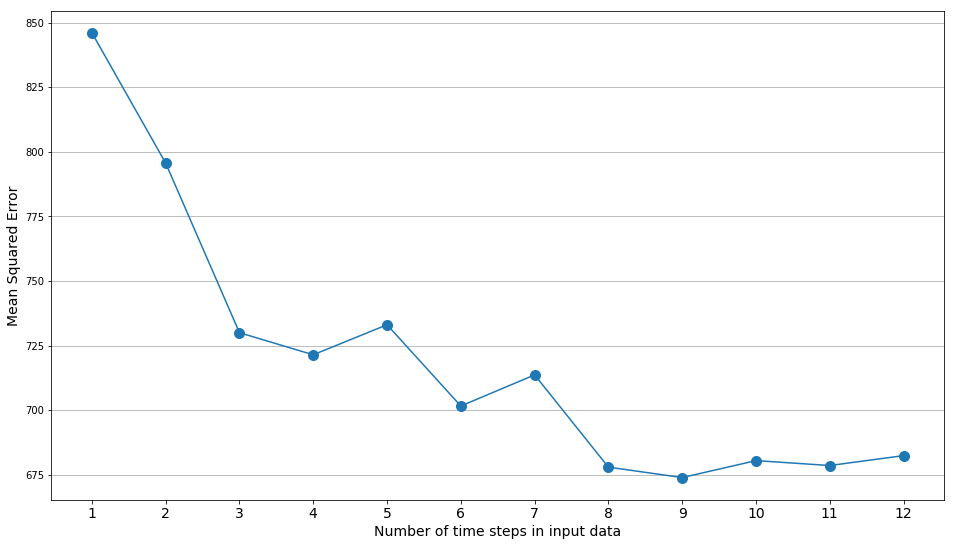

In [16]:
time_steps = [1,2,3,4,5,6,7,8,9,10,11,12]
fig, ax = plt.subplots(figsize=(16,9))
ax.grid(axis='y')
ax.plot(time_steps, mse[:12], marker='o', markersize=10)
ax.set_axisbelow(True)
plt.xticks( time_steps, fontsize=14)
ax.set_ylabel('Mean Squared Error', fontsize=14)
ax.set_xlabel('Number of time steps in input data', fontsize=14)
plt.savefig('ts_vs_mse.png', dpi=300, bbox_inches='tight')

In [5]:
trees = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
mse_trees = []

for t in trees:
    etr = MyExtraTreesRegressor()
    etr.model = ExtraTreesRegressor(random_state=17, n_estimators=t, max_depth=35, min_samples_split=2, min_samples_leaf=1, max_features=40, max_leaf_nodes=None)
    etr.fit_on_training_set()
    mse_trees.append(etr.get_mse())
    print("MSE for %d trees is %.2f"%(t, mse_trees[-1]))

MSE for 5 trees is 869.80
MSE for 10 trees is 766.31
MSE for 15 trees is 741.78
MSE for 20 trees is 742.37
MSE for 25 trees is 732.00
MSE for 30 trees is 713.27
MSE for 35 trees is 690.93
MSE for 40 trees is 694.62
MSE for 45 trees is 680.92
MSE for 50 trees is 673.92


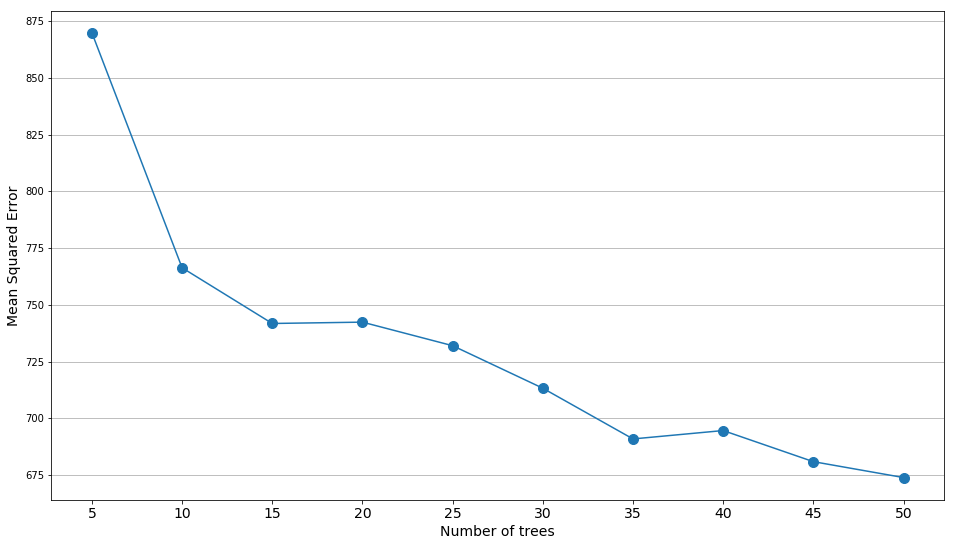

In [8]:
fig, ax = plt.subplots(figsize=(16,9))
ax.grid(axis='y')
ax.plot(trees, mse_trees, marker='o', markersize=10)
ax.set_axisbelow(True)
plt.xticks(trees, fontsize=14)
ax.set_ylabel('Mean Squared Error', fontsize=14)
ax.set_xlabel('Number of trees', fontsize=14)
plt.savefig('trees_vs_mse.png', dpi=300, bbox_inches='tight')